# Fetch bitstream using PID example

Fetching metadata in CMDI format [http://hdl.handle.net/11346/TEST--HGGA@format=cmdi]
Found [2] bitstreams elements in ResourceProxy elements
Filtering bitstreams according to specified mimetype [text/csv]
Found
 0. https://rda-summerschool.csc.fi/repository/xmlui/bitstream/handle/1/4/KUM_Tower_WDIR_32m_1min_2015.csv?sequence=1 [text/csv]
Fetching [https://rda-summerschool.csc.fi/repository/xmlui/bitstream/handle/1/4/KUM_Tower_WDIR_32m_1min_2015.csv?sequence=1]
Number of rows (with header):   525601
['samptime(UTC+2)', 'Tower_WDIR_32m']
['2015-01-01 00:00:00', '285.2594']
['2015-01-01 00:01:00', '285.7347']
['2015-01-01 00:02:00', '287.8657']
['2015-01-01 00:03:00', '286.0261']
['2015-01-01 00:04:00', '286.7316']
['2015-01-01 00:05:00', '287.7657']
['2015-01-01 00:06:00', '287.3422']
['2015-01-01 00:07:00', '283.9127']
['2015-01-01 00:08:00', '279.6095']
['2015-01-01 00:09:00', '285.8606']
['2015-01-01 00:10:00', '279.136']


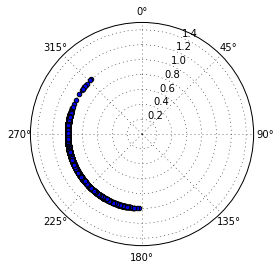

In [1]:
import urllib
import csv


def bitstream_info_from_pid(pid_url, mimetype=None):
    """
        Appends well known magic to the `pid_url` and retrieves the  metadata instead of the 
        landing page. The metadata are parsed to get the mimetype and bitstream url.
        
        The algorithm looks for items that have ResourceType set to `Resource`.
    """
    import xml.etree.ElementTree as ET

    pid_metadata_url = pid_url + "@format=cmdi"
    
    print "Fetching metadata in CMDI format [%s]" % pid_metadata_url
    ns = "{http://www.clarin.eu/cmd/}"
    metadata = urllib.urlopen(pid_metadata_url).read()
    root = ET.fromstring(metadata)
    
    # finding bitstream elements
    bitstream_info_arr = []
    for proxy in root.findall('.//%sResourceProxy' % ns):
        rt = proxy.find("./%sResourceType" % ns)
        rr = proxy.find("./%sResourceRef" % ns)
        if rt.text == "Resource":
            bitstream_info_arr.append(
                (rt.attrib.get("mimetype", "unknown"), rr.text)
            )
    print "Found [%d] bitstreams elements in ResourceProxy elements" % len(bitstream_info_arr)

    if mimetype is not None:
        print "Filtering bitstreams according to specified mimetype [%s]" % mimetype
        bitstream_info_arr = [x for x in bitstream_info_arr if x[0] == mimetype]    
    
    print "Found"
    print "%s" % "\n".join(["%2d. %s [%s]" % (i, x[1], x[0]) for i, x in enumerate(bitstream_info_arr)])
    return bitstream_info_arr


def plot(arr):
    """
        Just testing one way of visualisation.
    """
    import pandas as pd
    from matplotlib import pyplot as plt
    from math import radians

    fig = plt.figure()
    ax = fig.add_subplot(111, polar=True)
    ax.scatter(x=[radians(float(deg)) for _1, deg in arr], y=[1] * len(arr))
    ax.set_theta_zero_location('N')
    ax.set_theta_direction(-1)
    plt.show()


# PID to a clarin-dspace repository
# - metadata attached to the PID at http://hdl.handle.net/11346/TEST--HGGA?noredirect
pid_url = "http://hdl.handle.net/11346/TEST--HGGA"

# get urls to all bitstreams 
show_n = 10
for bitstream_mimetype, bitstream_url in bitstream_info_from_pid(pid_url, mimetype="text/csv"):
    print "Fetching [%s]" % bitstream_url
    data_csv = csv.reader(urllib.urlopen(bitstream_url))
    data_csv = [ [x.strip() for x in line] for line in data_csv ]
    print "Number of rows (with header): %8d" % len(data_csv)
    for i, row in enumerate(data_csv):
        print row
        if i > show_n:
            break

plot(data_csv[1:3000])